In [143]:
import pandas as pd
import numpy as np

from datetime import date

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import plotly.express as px

In [145]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

In [146]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Dataset
#### Se trata de un dataset de datos de pacientes a los que se les esta evaluando las causas de un derrame cerebral 

In [147]:
derrame = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [151]:
len(derrame)

5110

In [154]:
derrame.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [152]:
derrame

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## Limpieza de datos

### Revision de valores nulos

In [148]:
null_summary = pd.DataFrame()

In [149]:
for c_ in derrame.columns:
    r_ = pd.DataFrame({
        "Column" : [c_],
        "NaFound" : [ np.sum( pd.isnull( derrame[c_] ) ) ],
        "Percentage" : [ np.sum( pd.isnull( derrame[c_] ) ) / derrame.shape[0] ]
        
    })
    null_summary = pd.concat( [ null_summary, r_ ] )

In [150]:
null_summary

,Column,NaFound,Percentage
0,id,0,0.000000
0,gender,0,0.000000
0,age,0,0.000000
0,hypertension,0,0.000000
0,heart_disease,0,0.000000
0,ever_married,0,0.000000
0,work_type,0,0.000000
0,Residence_type,0,0.000000
0,avg_glucose_level,0,0.000000
0,bmi,201,0.039335


#### Se han encontrado valores nulos unicamente en la columna [ bmi ]

### Revision de valores en cada columna

In [182]:
derrame.groupby(['gender'], as_index=False).count()

,gender,id,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,2994,2994,2994,2994,2994,2994,2994,2994,2897,2994,2994
1,Male,2115,2115,2115,2115,2115,2115,2115,2115,2011,2115,2115
2,Other,1,1,1,1,1,1,1,1,1,1,1


#### ese unico valor de Other se podria eliminar o sustituir

In [190]:
derrame["age"].drop_duplicates()

0       67.00
1       61.00
2       80.00
3       49.00
4       79.00
        ...  
1614     0.08
1632     1.48
1975     0.56
2030     0.48
3618     0.16
Name: age, Length: 104, dtype: float64

#### al haber tantos valroes distintos en [ age ] se pude crear otra tabla donde esten en rangos, de 5 anios esta bien

In [191]:
derrame.groupby(['hypertension'], as_index=False).count()

,hypertension,id,gender,age,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,4612,4612,4612,4612,4612,4612,4612,4612,4458,4612,4612
1,1,498,498,498,498,498,498,498,498,451,498,498


#### esta correcto, valor de 0 es para negativo y el valor de 1 es para positivo

In [192]:
derrame.groupby(['heart_disease'], as_index=False).count()

,heart_disease,id,gender,age,hypertension,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,4834,4834,4834,4834,4834,4834,4834,4834,4666,4834,4834
1,1,276,276,276,276,276,276,276,276,243,276,276


#### esta correcto, 0 = negativo, 1 = positivo

In [193]:
derrame.groupby(['ever_married'], as_index=False).count()

,ever_married,id,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,No,1757,1757,1757,1757,1757,1757,1757,1757,1705,1757,1757
1,Yes,3353,3353,3353,3353,3353,3353,3353,3353,3204,3353,3353


#### se puede crear una nueva columna donde yes=1 y no=0, para tratar los valores numericamente

In [194]:
derrame.groupby(['work_type'], as_index=False).count()

,work_type,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Govt_job,657,657,657,657,657,657,657,657,630,657,657
1,Never_worked,22,22,22,22,22,22,22,22,22,22,22
2,Private,2925,2925,2925,2925,2925,2925,2925,2925,2811,2925,2925
3,Self-employed,819,819,819,819,819,819,819,819,775,819,819
4,children,687,687,687,687,687,687,687,687,671,687,687


#### igual, se pueden cambiar a valores numericos

In [195]:
derrame.groupby(['Residence_type'], as_index=False).count()

,Residence_type,id,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,Rural,2514,2514,2514,2514,2514,2514,2514,2514,2419,2514,2514
1,Urban,2596,2596,2596,2596,2596,2596,2596,2596,2490,2596,2596


#### igual, se pueden cambiar a valores numericos

In [196]:
derrame.groupby(['avg_glucose_level'], as_index=False).count()

,avg_glucose_level,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,bmi,smoking_status,stroke
0,55.12,1,1,1,1,1,1,1,1,1,1,1
1,55.22,1,1,1,1,1,1,1,1,1,1,1
2,55.23,1,1,1,1,1,1,1,1,1,1,1
3,55.25,1,1,1,1,1,1,1,1,1,1,1
4,55.26,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3974,266.59,1,1,1,1,1,1,1,1,1,1,1
3975,267.60,1,1,1,1,1,1,1,1,1,1,1
3976,267.61,1,1,1,1,1,1,1,1,1,1,1
3977,267.76,1,1,1,1,1,1,1,1,1,1,1


#### esta correcto

In [197]:
derrame.groupby(['bmi'], as_index=False).count()

,bmi,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke
0,10.3,1,1,1,1,1,1,1,1,1,1,1
1,11.3,1,1,1,1,1,1,1,1,1,1,1
2,11.5,1,1,1,1,1,1,1,1,1,1,1
3,12.0,1,1,1,1,1,1,1,1,1,1,1
4,12.3,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,66.8,1,1,1,1,1,1,1,1,1,1,1
414,71.9,1,1,1,1,1,1,1,1,1,1,1
415,78.0,1,1,1,1,1,1,1,1,1,1,1
416,92.0,1,1,1,1,1,1,1,1,1,1,1


#### tambien esta correcto

In [198]:
derrame.groupby(['smoking_status'], as_index=False).count()

,smoking_status,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
0,Unknown,1544,1544,1544,1544,1544,1544,1544,1544,1544,1483,1544
1,formerly smoked,885,885,885,885,885,885,885,885,885,837,885
2,never smoked,1892,1892,1892,1892,1892,1892,1892,1892,1892,1852,1892
3,smokes,789,789,789,789,789,789,789,789,789,737,789


#### igual, se puedn cambiar a valores numericos

In [199]:
derrame.groupby(['stroke'], as_index=False).count()

,stroke,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0,4861,4861,4861,4861,4861,4861,4861,4861,4861,4700,4861
1,1,249,249,249,249,249,249,249,249,249,209,249


#### esta correcto

# Limpiando el dataset

# Analizando dataset derrame

In [14]:
derrame.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x1b6dd917880>,
 'caps': [<matplotlib.lines.Line2D at 0x1b6dd917ee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b6dd9175b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b6dd936400>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b6dd9366d0>],
 'means': []}

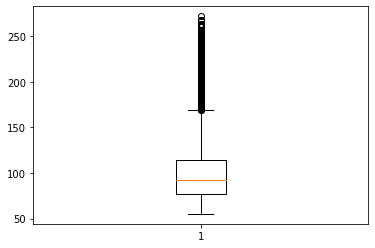

In [15]:
plt.boxplot(derrame["avg_glucose_level"])

In [16]:
d1 = derrame.groupby(["age"], as_index = False)["avg_glucose_level"].median()

In [17]:
d1

,age,avg_glucose_level
0,0.08,105.000
1,0.16,114.710
2,0.24,89.280
3,0.32,89.040
4,0.40,97.605
...,...,...
99,78.00,97.605
100,79.00,92.740
101,80.00,95.225
102,81.00,92.390


{'whiskers': [<matplotlib.lines.Line2D at 0x1b6dda260a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b6dda26520>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b6dda17d60>],
 'medians': [<matplotlib.lines.Line2D at 0x1b6dda26ac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b6dda26dc0>],
 'means': []}

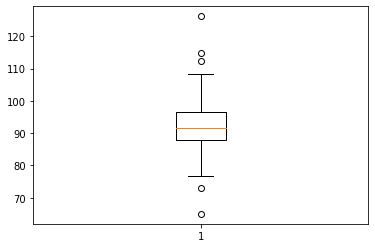

In [18]:
plt.boxplot(d1["avg_glucose_level"])

In [19]:
d2 = derrame.groupby(["age", "gender"], as_index = False)["avg_glucose_level"].median()

{'whiskers': [<matplotlib.lines.Line2D at 0x1b6dda88a60>,
 'caps': [<matplotlib.lines.Line2D at 0x1b6dda97040>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b6dda88790>],
 'medians': [<matplotlib.lines.Line2D at 0x1b6dda975e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b6dda978b0>],
 'means': []}

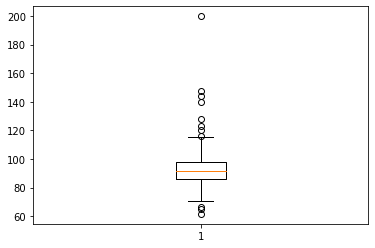

In [20]:
plt.boxplot(d2["avg_glucose_level"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1b6ddb06370>,
 'caps': [<matplotlib.lines.Line2D at 0x1b6ddb06910>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b6ddb060a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b6ddb06eb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b6ddb141f0>],
 'means': []}

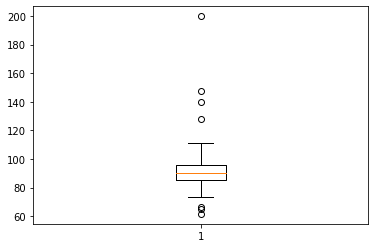

In [21]:
plt.boxplot(d2.loc[(d2["gender"] == "Female"), ["avg_glucose_level"]])

{'whiskers': [<matplotlib.lines.Line2D at 0x1b6ddb73220>,
 'caps': [<matplotlib.lines.Line2D at 0x1b6ddb737c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b6ddb64f10>],
 'medians': [<matplotlib.lines.Line2D at 0x1b6ddb73d60>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b6ddb81070>],
 'means': []}

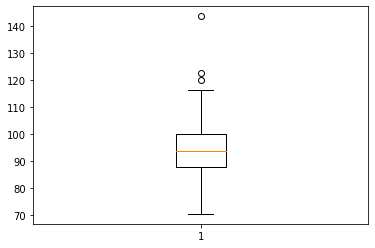

In [22]:
plt.boxplot(d2.loc[(d2["gender"] == "Male"), ["avg_glucose_level"]])

In [23]:
dt = derrame.loc[(derrame["smoking_status"] == "smokes") & (derrame["hypertension"] == 1), :]
dt2 = derrame.loc[(derrame["smoking_status"] == "smokes") & (derrame["hypertension"] == 0), :]

<AxesSubplot:xlabel='gender', ylabel='age'>

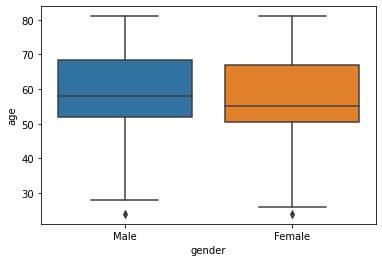

In [24]:
sns.boxplot(data=dt, x="gender", y="age")

<AxesSubplot:xlabel='gender', ylabel='age'>

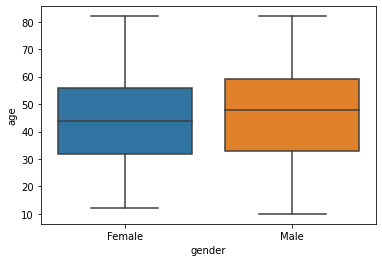

In [25]:
sns.boxplot(data=dt2, x="gender", y="age")

In [26]:
dt3 = derrame.loc[(derrame["smoking_status"] == "never smoked") & (derrame["hypertension"] == 1), :]
dt4 = derrame.loc[(derrame["smoking_status"] == "never smoked") & (derrame["hypertension"] == 0), :]

<AxesSubplot:xlabel='gender', ylabel='age'>

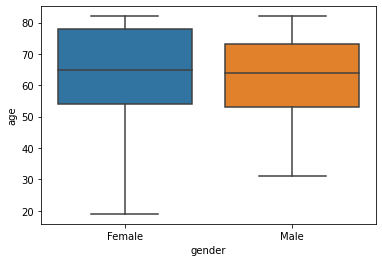

In [27]:
sns.boxplot(data=dt3, x="gender", y="age")

<AxesSubplot:xlabel='gender', ylabel='age'>

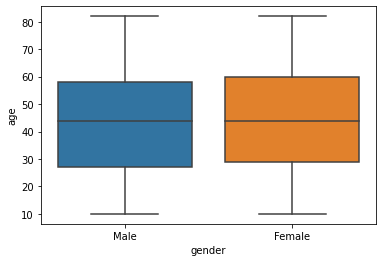

In [28]:
sns.boxplot(data=dt4, x="gender", y="age")

In [29]:
dt5 = derrame.loc[(derrame["hypertension"] == 1) & (derrame["heart_disease"] == 1), :]
dt6 = derrame.loc[(derrame["hypertension"] == 1) & (derrame["heart_disease"] == 0), :]

<AxesSubplot:xlabel='gender', ylabel='age'>

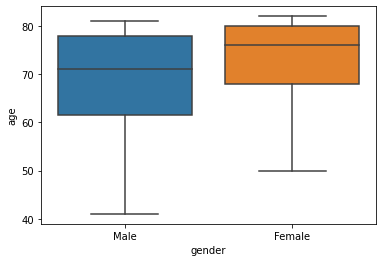

In [30]:
sns.boxplot(data=dt5, x="gender", y="age")

<AxesSubplot:xlabel='gender', ylabel='age'>

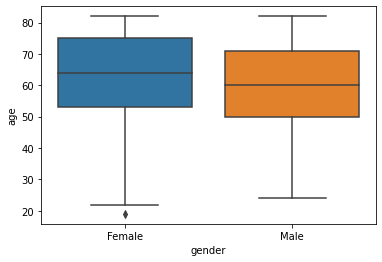

In [31]:
sns.boxplot(data=dt6, x="gender", y="age")

### analisis de valores atipicos a menores de 40, por genero y niveles de glucosa

In [32]:
menores40 = d2.loc[(d2["age"] < 40) , ["avg_glucose_level", "gender"]]

<AxesSubplot:xlabel='gender', ylabel='avg_glucose_level'>

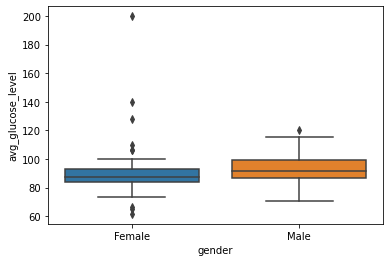

In [33]:
sns.boxplot(data=menores40, x="gender", y="avg_glucose_level")

In [34]:
FemMen40 = d2.loc[(d2["age"] < 40) & (d2["gender"] == "Female") , ["avg_glucose_level"]]

In [35]:
fem1 = np.quantile(FemMen40,0.25)
fem3 = np.quantile(FemMen40,0.75)

iqr = fem3 - fem1

In [36]:
upper_bound = fem3 - (1.5*iqr)
lower_bound = fem1 - (1.5*iqr)

In [37]:
fem_avg = FemMen40.loc[(FemMen40["avg_glucose_level"] < upper_bound) & (FemMen40["avg_glucose_level"] > lower_bound), :]

{'whiskers': [<matplotlib.lines.Line2D at 0x1b6ddf5a310>,
 'caps': [<matplotlib.lines.Line2D at 0x1b6ddf5a8b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b6ddf5a040>],
 'medians': [<matplotlib.lines.Line2D at 0x1b6ddf5ae50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b6ddf68160>],
 'means': []}

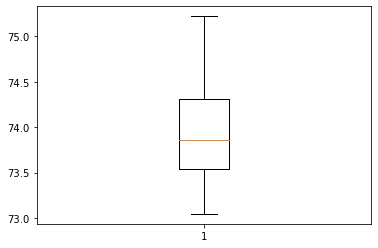

In [38]:
plt.boxplot(fem_avg)

# Revision de valores atipicos

### dataset derrame, solo las columnas con significancia

{'whiskers': [<matplotlib.lines.Line2D at 0x1b6ddfaefd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b6ddfbd5b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b6ddfaed00>],
 'medians': [<matplotlib.lines.Line2D at 0x1b6ddfbdb80>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b6ddfbde50>],
 'means': []}

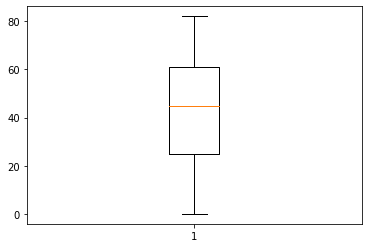

In [39]:
plt.boxplot( derrame['age'] )

{'whiskers': [<matplotlib.lines.Line2D at 0x1b6de012c70>,
 'caps': [<matplotlib.lines.Line2D at 0x1b6de023280>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b6de0129a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b6de023820>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b6de023af0>],
 'means': []}

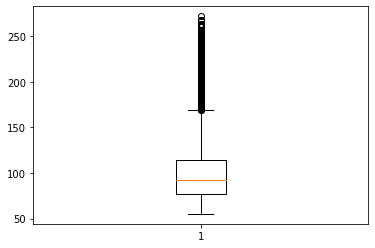

In [40]:
plt.boxplot( derrame['avg_glucose_level'] )

{'whiskers': [<matplotlib.lines.Line2D at 0x1b6df047970>,
 'caps': [<matplotlib.lines.Line2D at 0x1b6df047f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b6df0476a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b6df0544f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b6df0547c0>],
 'means': []}

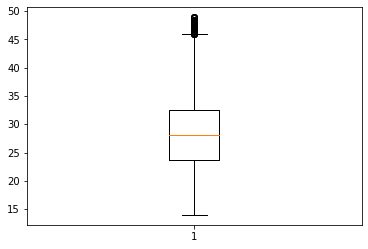

In [41]:
plt.boxplot( derrame['bmi'] )

### dataset derrame, valores atipicos para promedio de glucosa, por genero

<AxesSubplot:xlabel='gender', ylabel='avg_glucose_level'>

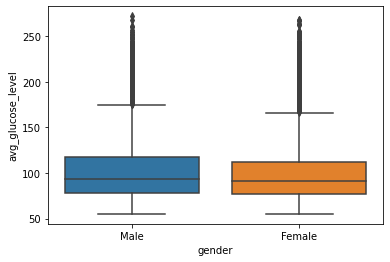

In [42]:
sns.boxplot( data=derrame  , x="gender" , y="avg_glucose_level" )

#### solo para el genero female

In [43]:
female_agl = derrame.loc[ derrame["gender"] == "Female" , ["avg_glucose_level"] ]

{'whiskers': [<matplotlib.lines.Line2D at 0x1b6df12f1c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b6df12f760>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b6df121e80>],
 'medians': [<matplotlib.lines.Line2D at 0x1b6df12fd00>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b6df12ffd0>],
 'means': []}

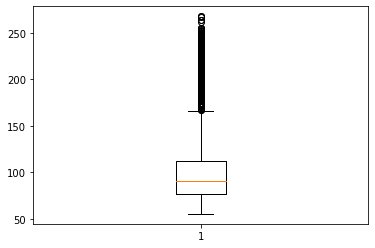

In [44]:
plt.boxplot(female_agl)

In [45]:
q1 = np.quantile( female_agl , 0.25 )
q3 = np.quantile( female_agl , 0.75 )

In [46]:
## Inter quartile range
iqr = q3 - q1

In [47]:
upper_bound = q3 + (1.5*iqr)
lower_bound = q1 - (1.5*iqr)

In [48]:
female_agl_2 = female_agl.loc[ (female_agl['avg_glucose_level'] < upper_bound) & (female_agl['avg_glucose_level'] > lower_bound) , : ]

{'whiskers': [<matplotlib.lines.Line2D at 0x1b6df18f8e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b6df18fe80>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b6df18f610>],
 'medians': [<matplotlib.lines.Line2D at 0x1b6df19e460>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b6df19e730>],
 'means': []}

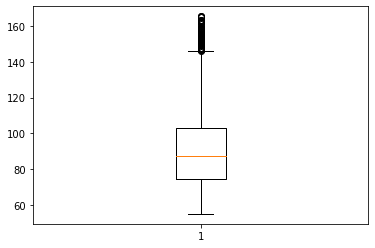

In [49]:
plt.boxplot(female_agl_2)

## analisis de correlacion en los datos, dataset derrame

In [50]:
c = derrame.corr()

In [51]:
c

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.278120,0.264852,0.236763,0.373703,0.246478
hypertension,0.278120,1.000000,0.111974,0.170028,0.158762,0.131965
heart_disease,0.264852,0.111974,1.000000,0.166847,0.060926,0.134610
avg_glucose_level,0.236763,0.170028,0.166847,1.000000,0.186348,0.133227
bmi,0.373703,0.158762,0.060926,0.186348,1.000000,0.056926
stroke,0.246478,0.131965,0.134610,0.133227,0.056926,1.000000


#### se puede notar que no existe ninguna correlacion significante entre los datos

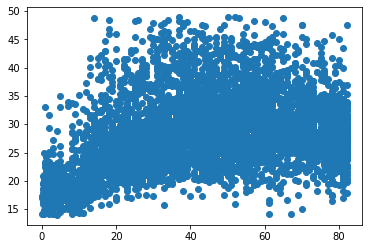

In [52]:
plt.scatter(derrame['age'], derrame['bmi'])

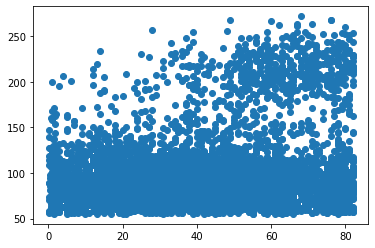

In [53]:
plt.scatter(derrame['age'], derrame['avg_glucose_level'])

C:\Users\eduar\AppData\Local\Temp\ipykernel_14832\808831101.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(c, mask=np.zeros_like(c, dtype = np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),


<AxesSubplot:>

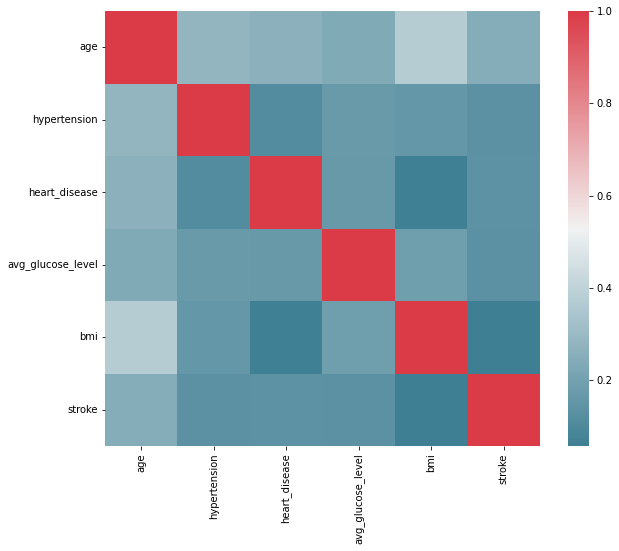

In [54]:
f, ax = plt.subplots(figsize = (10, 8))

sns.heatmap(c, mask=np.zeros_like(c, dtype = np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
           square=True, ax=ax)

#### de nuevo esto nos muestra que no hay correlacion marcada entre los datos

## Principal Components Analisis

In [55]:
derrame.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [56]:
derrame['ever_married'].drop_duplicates()

0    Yes
6     No
Name: ever_married, dtype: object

In [57]:
def to_change_married(r):
    if r['ever_married'] == "Yes" :
        r['ever_married'] = 1
        return r['ever_married']
    if r['ever_married'] == "No" :
        r['ever_married'] = 0
        return r['ever_married']

In [58]:
derrame['new_ever_married'] = derrame.apply( lambda r: to_change_married(r) , axis = 1)

#### transformamos los datos de la columna ever_married de yes=1 y no=0 y se colocan en una nueva columna new_ever_married

In [59]:
derrame.head(7)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,new_ever_married
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,1
5,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1,1
6,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1,0


In [60]:
columns_to_use = [
    "age",
    "hypertension",
    "heart_disease",
    "avg_glucose_level",
    "bmi",
    "stroke",
    "new_ever_married"
]

In [61]:
x = derrame.loc[ : , columns_to_use].values

In [62]:
x

array([[67. ,  0. ,  1. , ..., 36.6,  1. ,  1. ],
       [80. ,  0. ,  1. , ..., 32.5,  1. ,  1. ],
       [49. ,  0. ,  0. , ..., 34.4,  1. ,  1. ],
       ...,
       [45. ,  1. ,  0. , ..., 31.8,  0. ,  1. ],
       [40. ,  0. ,  0. , ..., 30. ,  0. ,  1. ],
       [80. ,  1. ,  0. , ..., 29.1,  0. ,  1. ]])

### estandarizamos los datos

In [63]:
x = StandardScaler().fit_transform(x)

In [64]:
x

array([[ 1.04058433, -0.32618577,  4.13675323, ...,  1.19323816,
         4.36860131,  0.72013718],
       [ 1.61427033, -0.32618577,  4.13675323, ...,  0.58938961,
         4.36860131,  0.72013718],
       [ 0.24624988, -0.32618577, -0.24173547, ...,  0.86922187,
         4.36860131,  0.72013718],
       ...,
       [ 0.06973111,  3.06573766, -0.24173547, ...,  0.48629352,
        -0.22890622,  0.72013718],
       [-0.15091734, -0.32618577, -0.24173547, ...,  0.22118927,
        -0.22890622,  0.72013718],
       [ 1.61427033,  3.06573766, -0.24173547, ...,  0.08863715,
        -0.22890622,  0.72013718]])

In [65]:
pca = PCA( n_components=2 )

In [66]:
principalComponents = pca.fit_transform(x)

In [67]:
principalComponents

array([[ 4.19410582e+00,  4.29513066e+00],
       [ 3.47354745e+00,  3.58218924e+00],
       [ 2.14417982e+00,  1.86056659e+00],
       ...,
       [ 1.31221028e+00, -1.44087562e-01],
       [-2.60896826e-03, -8.16015294e-01],
       [ 1.94533889e+00, -2.59787330e-01]])

In [68]:
pcadf = pd.DataFrame(data=principalComponents, columns=['c1','c2'] )

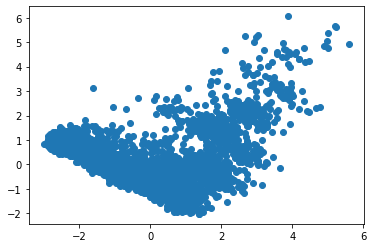

In [69]:
plt.scatter( pcadf['c1'], pcadf['c2'])

In [70]:
km = KMeans( n_clusters=3 ).fit(pcadf)

In [71]:
cetroids = km.cluster_centers_

In [72]:
cetroids

array([[ 2.38019484,  1.82885787],
       [-1.88725566,  0.57188483],
       [ 0.48426587, -0.66998056]])

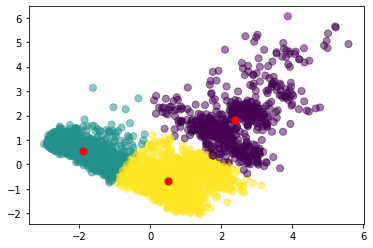

In [73]:
plt.scatter( pcadf['c1'], pcadf['c2'], c=km.labels_.astype(float), s=50, alpha=0.5 )
plt.scatter( [ cetroids[0][0], cetroids[1][0], cetroids[2][0] ], [ cetroids[0][1], cetroids[1][1], cetroids[2][1] ], c='red', s=50)

In [74]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

In [75]:
loadings

array([[ 0.85559233, -0.13040057],
       [ 0.46051194,  0.22314628],
       [ 0.38753199,  0.53619337],
       [ 0.45541599,  0.33766601],
       [ 0.59133721, -0.41525458],
       [ 0.3681077 ,  0.53496333],
       [ 0.75653307, -0.40200624]])

In [76]:
pca.components_

array([[ 0.55703529,  0.29981732,  0.25230356,  0.29649959,  0.3849914 ,
         0.23965734,  0.49254254],
       [-0.12498417,  0.21387754,  0.51392172,  0.32364051, -0.39800632,
         0.51274277, -0.38530826]])

In [77]:
derrame_n = derrame.loc[ : , ["age", "hypertension", "heart_disease", "avg_glucose_level", "bmi", "stroke", "new_ever_married"] ]

In [78]:
derrame_n.head(7)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,new_ever_married
0,67.0,0,1,228.69,36.6,1,1
1,80.0,0,1,105.92,32.5,1,1
2,49.0,0,0,171.23,34.4,1,1
3,79.0,1,0,174.12,24.0,1,1
4,81.0,0,0,186.21,29.0,1,1
5,74.0,1,1,70.09,27.4,1,1
6,69.0,0,0,94.39,22.8,1,0


In [79]:
derrame_n['cluster'] = km.labels_

In [80]:
derrame_n.head(7)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,new_ever_married,cluster
0,67.0,0,1,228.69,36.6,1,1,0
1,80.0,0,1,105.92,32.5,1,1,0
2,49.0,0,0,171.23,34.4,1,1,0
3,79.0,1,0,174.12,24.0,1,1,0
4,81.0,0,0,186.21,29.0,1,1,0
5,74.0,1,1,70.09,27.4,1,1,0
6,69.0,0,0,94.39,22.8,1,0,0


In [81]:
derrame_n.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,new_ever_married,cluster
age,1.000000,0.278120,0.264852,0.236763,0.373703,0.246478,0.677137,0.131311
hypertension,0.278120,1.000000,0.111974,0.170028,0.158762,0.131965,0.164534,-0.197553
heart_disease,0.264852,0.111974,1.000000,0.166847,0.060926,0.134610,0.114765,-0.505252
avg_glucose_level,0.236763,0.170028,0.166847,1.000000,0.186348,0.133227,0.150724,-0.201836
bmi,0.373703,0.158762,0.060926,0.186348,1.000000,0.056926,0.371690,0.216392
stroke,0.246478,0.131965,0.134610,0.133227,0.056926,1.000000,0.108398,-0.475663
new_ever_married,0.677137,0.164534,0.114765,0.150724,0.371690,0.108398,1.000000,0.406711
cluster,0.131311,-0.197553,-0.505252,-0.201836,0.216392,-0.475663,0.406711,1.000000


In [108]:
fig = px.scatter(principalComponents, x=0, y=1, color=derrame_n['cluster'])

In [142]:
for i, feature in enumerate(columns_to_use):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1]
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
fig.show()

## conclusiones
#### 1. se puede ver una correlacion entre los casados y la masa corporal(es decir los casados aumentan su masa corporal... )
#### 2. la hypertension esta mas presente en los que tienen niveles de glucosa alto
#### 3. hay una muy estrecha relacion entre los que padecen un ataque al corazon con los que padecieron el derrame...
#### 4. la edad parece  no tener ninguna relacion significante

## Regresion Lineal
### buscaremos una regresion entre el bmi y el promedio de glucosa, por eso trataremos de hacer la prediccion para esas variables.

In [127]:
x = derrame.loc[ : , ['bmi']].values
y = derrame.loc[ : , 'avg_glucose_level'].values

In [128]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split( x, y, test_size=.3, random_state=0 )

In [129]:
np.mean(y)

105.94356153382854

In [130]:
np.mean(Y_Train)

105.86819850831898

In [131]:
np.mean(Y_Test)

106.11929096989967

In [132]:
regression = LinearRegression()
regression.fit( X_Train , Y_Train )

LinearRegression()

In [133]:
Y_Test

array([110.6 , 234.06,  72.28, ..., 115.46, 129.19,  84.1 ])

In [134]:
regression.predict( X_Test )

array([111.62672063, 112.10339549,  94.5855946 , ..., 104.83410396,
       108.40916537,  95.53894431])

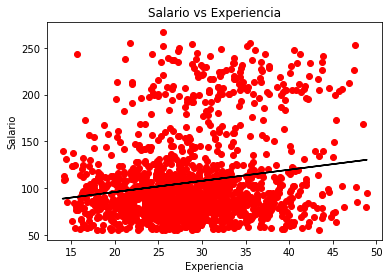

In [135]:
viz_train = plt
viz_train.scatter(X_Test, Y_Test, color = 'red')
viz_train.plot(X_Train,regression.predict(X_Train), color = 'black')
viz_train.title('Salario vs Experiencia')
viz_train.xlabel("Experiencia")
viz_train.ylabel("Salario")
viz_train.show()

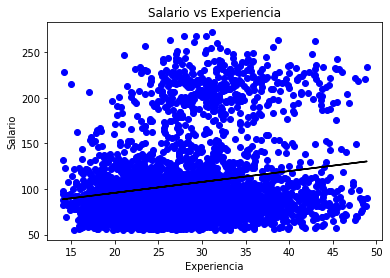

In [136]:
viz_train = plt
viz_train.scatter(X_Train, Y_Train, color = 'blue')
viz_train.plot(X_Train,regression.predict(X_Train), color = 'black')
viz_train.title('Salario vs Experiencia')
viz_train.xlabel("Experiencia")
viz_train.ylabel("Salario")
viz_train.show()

In [137]:
regression.intercept_

71.94353904494415

In [138]:
regression.coef_[0]

1.1916871347371356

## analisis de valores atipicos generalizado, para bmi por genero

<AxesSubplot:xlabel='gender', ylabel='bmi'>

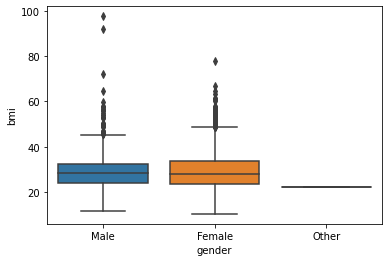

In [84]:
sns.boxplot( data=derrame  , x="gender" , y="bmi" )

#### los agrupamos por zona de residencia y genero, analizando el bmi

In [85]:
dfq1 = derrame.loc[ : , ["Residence_type","gender","bmi"] ].groupby( ["Residence_type","gender"] , as_index = False ).quantile(0.25)
dfq1.columns = ["Residence_type","gender", "bmi_q1"]

In [86]:
dfq3 = derrame.loc[ : , ["Residence_type","gender","bmi"] ].groupby( ["Residence_type","gender"] , as_index = False ).quantile(0.75)
dfq3.columns = ["Residence_type","gender", "bmi_q3"]

In [87]:
dfq2 = derrame.loc[ : , ["Residence_type","gender","bmi"] ].groupby( ["Residence_type","gender"] , as_index = False ).mean()
dfq2.columns = ["Residence_type","gender", "bmi_q2"]

In [88]:
df_iqr = dfq1.merge( dfq3 , on=["Residence_type","gender"] , how="inner" ).merge( dfq2 , on=["Residence_type","gender"] , how="inner" )

In [89]:
df_iqr.head(10)

,Residence_type,gender,bmi_q1,bmi_q3,bmi_q2
0,Rural,Female,23.4,33.2,29.043952
1,Rural,Male,24.0,32.4,28.686948
2,Rural,Other,22.4,22.4,22.400000
3,Urban,Female,23.3,33.8,29.086780
4,Urban,Male,24.0,32.8,28.609655


In [90]:
df_iqr["iqr"] = df_iqr.apply( lambda r: r["bmi_q3"] - r["bmi_q1"] , axis = 1)

In [91]:
df_iqr.head(3)

,Residence_type,gender,bmi_q1,bmi_q3,bmi_q2,iqr
0,Rural,Female,23.4,33.2,29.043952,9.8
1,Rural,Male,24.0,32.4,28.686948,8.4
2,Rural,Other,22.4,22.4,22.400000,0.0


In [92]:
df_iqr["upper"] = df_iqr.apply( lambda r: ( r["bmi_q3"] + 1.5*r["iqr"] ) , axis = 1)
df_iqr["lower"] = df_iqr.apply( lambda r: ( r["bmi_q1"] - 1.5*r["iqr"] ) , axis = 1)

In [93]:
df_iqr.head(3)

,Residence_type,gender,bmi_q1,bmi_q3,bmi_q2,iqr,upper,lower
0,Rural,Female,23.4,33.2,29.043952,9.8,47.9,8.7
1,Rural,Male,24.0,32.4,28.686948,8.4,45.0,11.4
2,Rural,Other,22.4,22.4,22.400000,0.0,22.4,22.4


In [94]:
df_t = derrame.merge( df_iqr , on=["Residence_type","gender"] , how="left" ).copy()

In [95]:
df_t.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_q1,bmi_q3,bmi_q2,iqr,upper,lower
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,24.0,32.8,28.609655,8.8,46.00,10.80
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,23.4,33.2,29.043952,9.8,47.90,8.70
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,24.0,32.4,28.686948,8.4,45.00,11.40
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,23.3,33.8,29.086780,10.5,49.55,7.55
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,23.4,33.2,29.043952,9.8,47.90,8.70
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,24.0,32.8,28.609655,8.8,46.00,10.80
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1,24.0,32.4,28.686948,8.4,45.00,11.40
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1,23.3,33.8,29.086780,10.5,49.55,7.55
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1,23.4,33.2,29.043952,9.8,47.90,8.70
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1,23.3,33.8,29.086780,10.5,49.55,7.55


In [96]:
def getRealBmi(r):
    if ( r["bmi"] <= r["lower"] ) | ( r["bmi"] >= r["upper"] ):
        return r["bmi_q2"]
    else:
        return r["bmi"]

In [97]:
df_t.apply( lambda r: getRealBmi(r) , axis = 1 )

0       36.6
1        NaN
2       32.5
3       34.4
4       24.0
        ... 
5105     NaN
5106    40.0
5107    30.6
5108    25.6
5109    26.2
Length: 5110, dtype: float64

In [98]:
df_t["new_bmi"] = df_t.apply( lambda r: getRealBmi(r) , axis = 1 )

#### nos queda un nuevo dataframe con el bmi antiguo y el nuevo bmi

In [99]:
df_t.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_q1,bmi_q3,bmi_q2,iqr,upper,lower,new_bmi
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,24.0,32.8,28.609655,8.8,46.00,10.80,36.6
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,23.4,33.2,29.043952,9.8,47.90,8.70,NaN
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,24.0,32.4,28.686948,8.4,45.00,11.40,32.5
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,23.3,33.8,29.086780,10.5,49.55,7.55,34.4
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,23.4,33.2,29.043952,9.8,47.90,8.70,24.0
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,24.0,32.8,28.609655,8.8,46.00,10.80,29.0
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1,24.0,32.4,28.686948,8.4,45.00,11.40,27.4
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1,23.3,33.8,29.086780,10.5,49.55,7.55,22.8
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1,23.4,33.2,29.043952,9.8,47.90,8.70,NaN
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1,23.3,33.8,29.086780,10.5,49.55,7.55,24.2


#### Comparacion

<AxesSubplot:xlabel='gender', ylabel='bmi'>

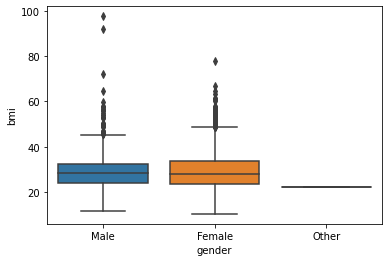

In [100]:
sns.boxplot( data=df_t  , x="gender" , y="bmi" )

<AxesSubplot:xlabel='gender', ylabel='new_bmi'>

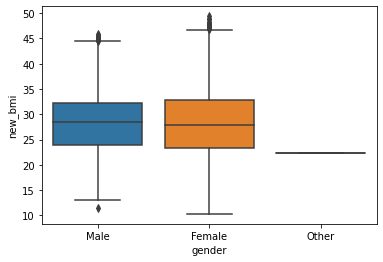

In [101]:
sns.boxplot( data=df_t  , x="gender" , y="new_bmi" )

#### pequena conclusion: los valores se trataron pero no se limpiaron del todo, para no comprometer la integridad de los datos

<AxesSubplot:xlabel='Residence_type', ylabel='new_bmi'>

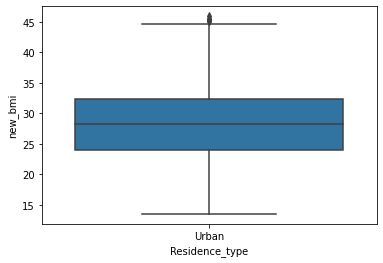

In [102]:
sns.boxplot( data=df_t.loc[ (df_t['gender'] == 'Male') & (df_t['Residence_type'] == "Urban") , : ]  , x="Residence_type" , y="new_bmi" )

<AxesSubplot:xlabel='Residence_type', ylabel='bmi'>

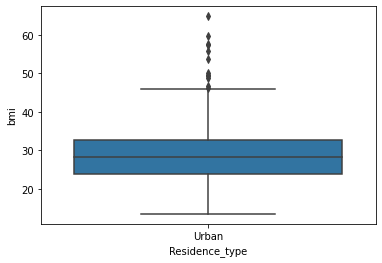

In [103]:
sns.boxplot( data=df_t.loc[ (df_t['gender'] == 'Male') & (df_t['Residence_type'] == "Urban") , : ]  , x="Residence_type" , y="bmi" )

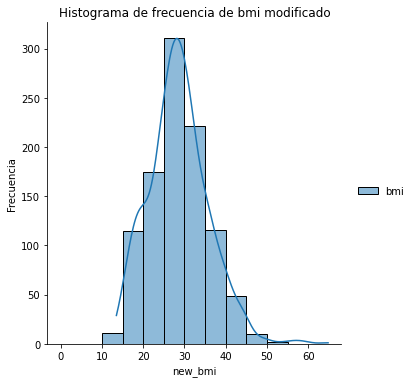

In [104]:
frecuencia = range(0 , 60, 5)

sns.displot( df_t.loc[(df_t['gender'] == 'Male') & (df_t['Residence_type'] == "Urban") , ['bmi']  ] ,
            color='#F2AB6A', bins=frecuencia, kde=True)

plt.ylabel('Frecuencia')
plt.xlabel('new_bmi')
plt.title('Histograma de frecuencia de bmi modificado')

plt.show()

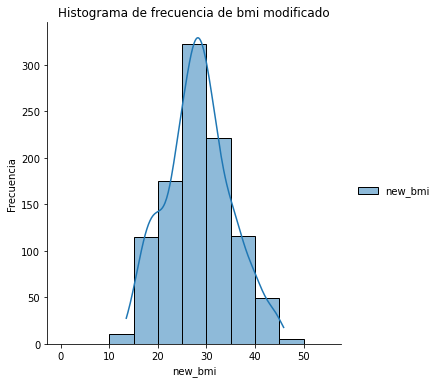

In [105]:
frecuencia = range(0 , 60, 5)

sns.displot( df_t.loc[(df_t['gender'] == 'Male') & (df_t['Residence_type'] == "Urban") , ['new_bmi']  ] ,
            color='#F2AB6A', bins=frecuencia, kde=True)

plt.ylabel('Frecuencia')
plt.xlabel('new_bmi')
plt.title('Histograma de frecuencia de bmi modificado')

plt.show()